![alt text](<Screenshot 2025-01-12 190930.png>)

Autoencoder is a type of self supervision models
- Autoencoders are neural networks that learn to reconstruct their inputs from a compressed representation. They are typically used for dimensionality reduction, denoising, and feature extraction. In this example, we will implement a simple autoencoder using PyTorch.

![alt text](<Screenshot 2025-01-12 191424.png>)

Will use MNIST Dataset for this implementation

In [1]:
import requests

def save_url_content_as_py(url, file_name):
    try:
        response = requests.get(url)
        response.raise_for_status()  # Check for HTTP errors

        # Open the file with UTF-8 encoding
        with open(file_name, 'w', encoding='utf-8') as file:
            file.write(response.text)

        print(f"Content from {url} saved to {file_name} successfully.")
    except requests.RequestException as e:
        print(f"Error fetching content from {url}: {e}")
    except IOError as e:
        print(f"Error writing to file {file_name}: {e}")

# Example usage:
url = "https://raw.githubusercontent.com/Amr-Abdellatif/Full-Autoencoder-implemented-in-PyTorch/main/utils.py"
file_name = "utils.py"

save_url_content_as_py(url, file_name)


Content from https://raw.githubusercontent.com/Amr-Abdellatif/Full-Autoencoder-implemented-in-PyTorch/main/utils.py saved to utils.py successfully.


In [2]:
import torch
from torch import nn
import torch.nn.functional as F
from utils import View
from utils import train_network
from torch.utils.data import Dataset, DataLoader
from torchvision import datasets
from torchvision.datasets import MNIST
from torchvision import transforms
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from tqdm.autonotebook import tqdm

m:\pytorch arabic\PyTorch_Projects_Amr_Osama\utils.py:7: TqdmExperimentalWarning: Using `tqdm.autonotebook.tqdm` in notebook mode. Use `tqdm.tqdm` instead to force console mode (e.g. in jupyter console)
  from tqdm.autonotebook import tqdm


In [3]:
D = 28*28 # dimension of the MNIST dataset
n = 2      # latent space dimension
c = 1      # channels
classses = 10 # no. of classes

In [4]:
device = 'cuda' if torch.cuda.is_available() else 'cpu'"Screenshot 2025-01-12 190930.png"
device

'cuda'

In [5]:
!nvidia-smi

Wed Jan 15 11:48:47 2025       
+---------------------------------------------------------------------------------------+
| NVIDIA-SMI 531.61                 Driver Version: 531.61       CUDA Version: 12.1     |
|-----------------------------------------+----------------------+----------------------+
| GPU  Name                      TCC/WDDM | Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp  Perf            Pwr:Usage/Cap|         Memory-Usage | GPU-Util  Compute M. |
|                                         |                      |               MIG M. |
|=========================================+======================+======================|
|   0  NVIDIA GeForce GTX 1060       WDDM | 00000000:01:00.0 Off |                  N/A |
| N/A   46C    P8                9W /  N/A|      0MiB /  6144MiB |      0%      Default |
|                                         |                      |                  N/A |
+-----------------------------------------+----------------------+--

1. Autoencoder is seflsupervised model (no labels) (X,y) -> (X,X)

In [6]:
class AutoEncodeDataset(Dataset):
    """"
    takes dataset (x,y) and returns(x,x)
    """
    def __init__(self, dataset):
        self.dataset = dataset

    def __len__(self):
        return len(self.dataset)
    
    def __getitem__(self, idx):
        x,y = self.dataset.__getitem__(idx) # discard y (lables)
        return x,x


In [7]:
train_data = AutoEncodeDataset(MNIST("./", train = True, download= True, transform= transforms.ToTensor()))
test_data_xy = MNIST("./", train=False, transform=transforms.ToTensor(), download=True)
test_data_xx = AutoEncodeDataset(test_data_xy)

train_loader = DataLoader(train_data, batch_size=128, shuffle=True)
test_loader = DataLoader(test_data_xx, batch_size=128)

In [8]:
x , l = next(iter(test_data_xy))
x.shape , l

(torch.Size([1, 28, 28]), 7)

In [9]:
x , x2 = next(iter(test_data_xx))
x.shape , x2.shape

(torch.Size([1, 28, 28]), torch.Size([1, 28, 28]))

# Builiding block of the autoencoder

In [10]:
def get_layer(in_size, out_size):
    "this function take input size and changes it to the output size"
    return nn.Sequential(
        nn.Linear(in_size, out_size),
        nn.BatchNorm1d(out_size),
        nn.ReLU()
    )

In [11]:
auto_encoder = nn.Sequential(
    nn.Flatten(), # 784 (28*28)
    get_layer(D, D//2),
    get_layer(D//2, D//3),
    get_layer(D//3, D//4),
    nn.Linear(D//4, n)

)

auto_decoder = nn.Sequential(
    get_layer(n, D//4),
    get_layer(D//4, D//3),
    get_layer(D//3, D//2),
    nn.Linear(D//2, D),
    View(-1,1,28,28)
)

In [12]:
auto_encode_decode = nn.Sequential(
    auto_encoder,
    auto_decoder
) 
# this is the decoder

In [13]:
train_network(model=auto_encode_decode,loss_func=nn.MSELoss(),
                train_loader=train_loader,
                test_loader=test_loader,
                epochs=10,
                device=device)

Epoch:   0%|          | 0/10 [00:00<?, ?it/s]

Training:   0%|          | 0/469 [00:00<?, ?it/s]

Testing:   0%|          | 0/79 [00:00<?, ?it/s]

Training:   0%|          | 0/469 [00:00<?, ?it/s]

Testing:   0%|          | 0/79 [00:00<?, ?it/s]

Training:   0%|          | 0/469 [00:00<?, ?it/s]

Testing:   0%|          | 0/79 [00:00<?, ?it/s]

Training:   0%|          | 0/469 [00:00<?, ?it/s]

Testing:   0%|          | 0/79 [00:00<?, ?it/s]

Training:   0%|          | 0/469 [00:00<?, ?it/s]

Testing:   0%|          | 0/79 [00:00<?, ?it/s]

Training:   0%|          | 0/469 [00:00<?, ?it/s]

Testing:   0%|          | 0/79 [00:00<?, ?it/s]

Training:   0%|          | 0/469 [00:00<?, ?it/s]

Testing:   0%|          | 0/79 [00:00<?, ?it/s]

Training:   0%|          | 0/469 [00:00<?, ?it/s]

Testing:   0%|          | 0/79 [00:00<?, ?it/s]

Training:   0%|          | 0/469 [00:00<?, ?it/s]

Testing:   0%|          | 0/79 [00:00<?, ?it/s]

Training:   0%|          | 0/469 [00:00<?, ?it/s]

Testing:   0%|          | 0/79 [00:00<?, ?it/s]

,epoch,total time,train loss,test loss
0,0,19.282077,0.050876,0.044165
1,1,31.366358,0.044024,0.042209
2,2,43.540908,0.042473,0.040717
3,3,55.989124,0.041539,0.040036
4,4,68.164651,0.041031,0.039764
5,5,80.293395,0.040334,0.039006
6,6,92.658520,0.039871,0.038524
7,7,104.868056,0.039500,0.038227
8,8,117.854813,0.039157,0.038055
9,9,129.987683,0.038866,0.037831


In [14]:
def encode_batch(encoder,dataset_to_encode):
    """
    encoder: the PyTorch network that takes in a dataset and convers it to a new dimension
    dataset_to_encode: a PyTorch `Dataset` object that we want to convert. 

    Returns a tuple (projected, labels) where `projected` is the encoded version of the dataset,
    and `labels` are the original labels provided by the `dataset_to_encode`
    """
    projected = []
    labels = []
    # put the encoder to evaluation mode and pass it to the cpu
    encoder = encoder.eval()
    encoder = encoder.cpu()
    with torch.inference_mode():
        for x,y in DataLoader(dataset_to_encode,batch_size=128):
            z = encoder(x.cpu()) # move x to cpu just in case it wasn't already there
            projected.append(z.numpy())
            labels.append(y.cpu().numpy().ravel()) 
            
    projected = np.concatenate(projected, axis=0)
    labels = np.concatenate(labels, axis=0)

    return projected , labels

In [15]:
projected , labels = encode_batch(auto_encode_decode,test_data_xy)
projected.shape , projected.ndim

((10000, 1, 28, 28), 4)

In [16]:
projected , labels = encode_batch(auto_encoder,test_data_xy)
projected.shape , projected.ndim

((10000, 2), 2)

<Axes: >

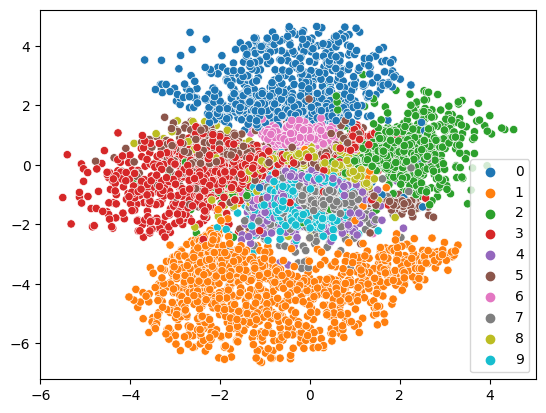

In [17]:
sns.scatterplot(
    x=projected[:,0],
    y=projected[:,1],
    hue=[str(l) for l in labels],
    hue_order=[str(i) for i in range(10)],
    legend="full")

In [18]:
def show_encode_decode(encode_decode,x):
    """
    encode_decode: the PyTorch Module that does the encoding and decoding steps at once
    x: the input to plot as is, and after encoding & decoding it
    """
    encode_decode = encode_decode.eval()
    encode_decode = encode_decode.cpu()
    with torch.inference_mode():
        x_recon = encode_decode(x.cpu())
        f , axarr = plt.subplots(1,2)
    axarr[0].imshow(x.numpy()[0,:])
    axarr[1].imshow(x_recon.numpy()[0,0,:])

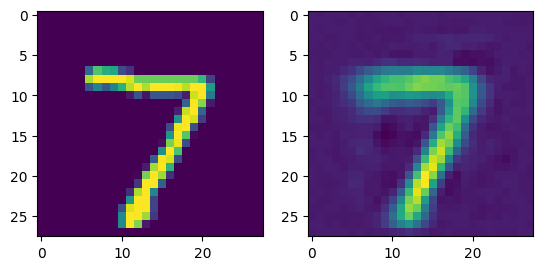

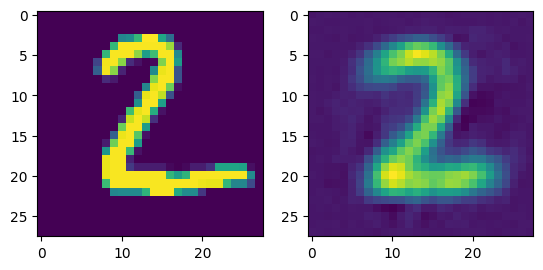

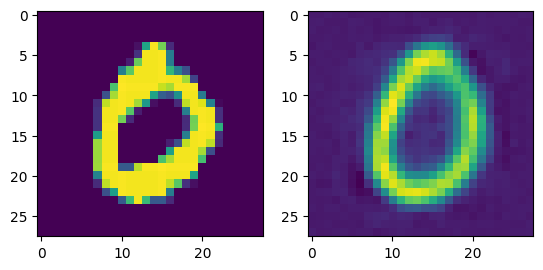

In [19]:
show_encode_decode(auto_encode_decode,test_data_xx[0][0])
show_encode_decode(auto_encode_decode,test_data_xx[1][0])
show_encode_decode(auto_encode_decode,test_data_xx[3][0])